# Assignment 5 - Feature Extraction and Matching

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randrange

In [0]:
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

# Load the images

(Text(0.5, 1.0, 'NEMO Sketch'), <matplotlib.image.AxesImage at 0x7f466bc66cc0>)

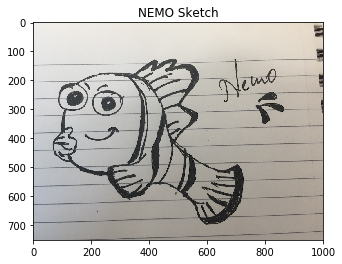

In [31]:
sketch_nemo = cv2.imread('Nemo.JPG')
sketch_nemo = cv2.cvtColor(sketch_nemo, cv2.COLOR_BGR2RGB)
plt.title("NEMO Sketch"), plt.imshow(sketch_nemo)

(Text(0.5, 1.0, 'Winnie the Pooh Sketch'),
 <matplotlib.image.AxesImage at 0x7f466bbdd588>)

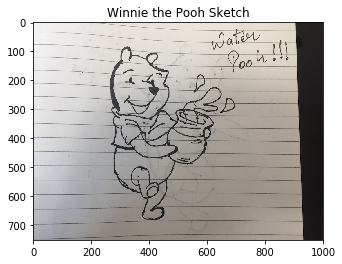

In [32]:
sketch_wtp = cv2.imread('Winnie_the_pooh.JPG')
sketch_wtp = cv2.cvtColor(sketch_wtp, cv2.COLOR_BGR2RGB)
plt.title("Winnie the Pooh Sketch"), plt.imshow(sketch_wtp)

(Text(0.5, 1.0, 'Nemo orignal'),
 <matplotlib.image.AxesImage at 0x7f466bbb5828>)

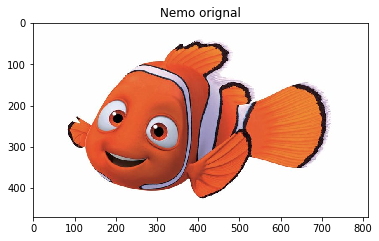

In [33]:
org_nemo = cv2.imread('nemo_original.png')
org_nemo = cv2.cvtColor(org_nemo, cv2.COLOR_BGR2RGB)
plt.title('Nemo orignal'), plt.imshow(org_nemo)

(Text(0.5, 1.0, 'Winnie the pooh orignal'),
 <matplotlib.image.AxesImage at 0x7f466bb91ef0>)

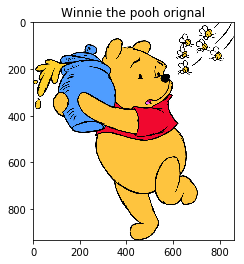

In [34]:
org_wtp = cv2.imread('winnie_original.jpg')
org_wtp = cv2.cvtColor(org_wtp, cv2.COLOR_BGR2RGB)
plt.title('Winnie the pooh orignal'), plt.imshow(org_wtp)

# Extract SIFT features

In [0]:
# compute the SIFT features
sift = cv2.xfeatures2d.SIFT_create()

# sn: sketch of nemo, sw: sketch of winnie
# find the keypoints and descriptors with SIFT
kp_sn, des_sn = sift.detectAndCompute(sketch_nemo,None)
kp_sw, des_sw = sift.detectAndCompute(sketch_wtp,None)

In [0]:
# extract SIFT features for the original images
kp_on, des_on = sift.detectAndCompute(org_nemo,None)
kp_ow, des_ow = sift.detectAndCompute(org_wtp,None)

# Match the SIFT features and predict quality of the sketch

(<matplotlib.image.AxesImage at 0x7f466b77ac88>,
 Text(0.5, 1.0, 'Matching keypoints, Nemo'))

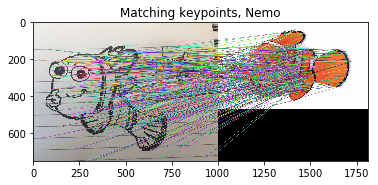

In [54]:
# match the SIFT features
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des_sn,des_on, k=2)

# Apply ratio test
good12 = []
for m in matches12:
     if m[0].distance < 0.8*m[1].distance:         
        good12.append(m)
matches12 = np.asarray(good12)

# cv2.drawMatchesKnn expects list of lists as matches.
nemo = cv2.drawMatchesKnn(sketch_nemo,kp_sn,org_nemo,kp_on,good12,None,flags=2)
plt.imshow(nemo), plt.title("Matching keypoints, Nemo")

In [55]:
# Define how similar they are
number_keypoints = 0
if len(kp_sn) <= len(kp_on):
    number_keypoints = len(kp_sn)
else:
    number_keypoints = len(kp_on)
    
print("Keypoints of Nemo Sketch Image: " + str(len(kp_sn)))
print("Keypoints of  Image: " + str(len(kp_on)))
print("GOOD Matches:", len(matches12))
print("Quality of the sketch: ", len(matches12) / number_keypoints * 100)

Keypoints of Nemo Sketch Image: 2709
Keypoints of  Image: 420
GOOD Matches: 193
Quality of the sketch:  45.95238095238095


(<matplotlib.image.AxesImage at 0x7f466b7369e8>,
 Text(0.5, 1.0, 'Matching keypoints, Winnie the Pooh'))

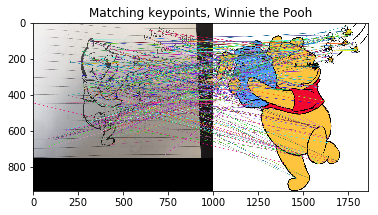

In [56]:
# match the SIFT features
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des_sw,des_ow, k=2)

# Apply ratio test
good12 = []
for m in matches12:
     if m[0].distance < 0.8*m[1].distance:         
        good12.append(m)
matches12 = np.asarray(good12)

# cv2.drawMatchesKnn expects list of lists as matches.
wtp = cv2.drawMatchesKnn(sketch_wtp,kp_sw,org_wtp,kp_ow,good12,None,flags=2)
plt.imshow(wtp), plt.title("Matching keypoints, Winnie the Pooh")

In [57]:
# Define how similar they are
number_keypoints = 0
if len(kp_sn) <= len(kp_on):
    number_keypoints = len(kp_sw)
else:
    number_keypoints = len(kp_ow)
    
print("Keypoints of Nemo Sketch Image: " + str(len(kp_sw)))
print("Keypoints of  Image: " + str(len(kp_ow)))
print("GOOD Matches:", len(matches12))
print("Quality of the sketch: ", len(matches12) / number_keypoints * 100)

Keypoints of Nemo Sketch Image: 1699
Keypoints of  Image: 795
GOOD Matches: 150
Quality of the sketch:  18.867924528301888
